In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f6518a60da3c44188ddeb23501d16676 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YWaHl-dxNLC25X52M2q4rX_qbBvfhnwpsW6FoasMRQYx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_f6518a60da3c44188ddeb23501d16676.get_object(Bucket='fertilizerrecommendation-donotdelete-pr-ifyecmexm4gjka', Key='Fertilizers_RS_For_Disease_ Prediction.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [6]:
from io import BytesIO
import zipfile
unzip =zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')

In [7]:
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

#Mount the drive click on third symbol

In [2]:
ls

'Dataset Plant Disease'/   Veg_pathon.h5   Veg-pathon-model.tgz


In [10]:
pwd

'/home/wsuser/work'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=False) #
test_datagen=ImageDataGenerator(rescale=1./255) #

In [5]:
x_train=train_datagen.flow_from_directory('/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/train', target_size=(128,128), class_mode='categorical', 
                                          batch_size=8)

Found 5384 images belonging to 6 classes.


In [6]:
x_test=test_datagen.flow_from_directory('/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test', target_size=(128,128), class_mode='categorical', 
                                          batch_size=8)

Found 1686 images belonging to 6 classes.


In [7]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [8]:
x_train

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPool2D, Flatten

In [10]:
model=Sequential()
model.add(Convolution2D(64,(3,3), input_shape=(128,128,3),activation='relu'))


In [11]:
model.add(MaxPool2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

Hidden Layers

In [13]:
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

Output Layer

In [14]:
model.add(Dense(6,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense (Dense)               (None, 128)               32514176  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                        

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
len(x_train)

673

In [18]:
673/8

84.125

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
673/673 [==============================] - 232s 343ms/step - loss: 0.8213 - accuracy: 0.7944 - val_loss: 0.2924 - val_accuracy: 0.8974
Epoch 2/10
673/673 [==============================] - 233s 346ms/step - loss: 0.2821 - accuracy: 0.9021 - val_loss: 0.2828 - val_accuracy: 0.9051
Epoch 3/10
673/673 [==============================] - 232s 345ms/step - loss: 0.2287 - accuracy: 0.9140 - val_loss: 0.2154 - val_accuracy: 0.9342
Epoch 4/10
673/673 [==============================] - 233s 346ms/step - loss: 0.2052 - accuracy: 0.9281 - val_loss: 0.2574 - val_accuracy: 0.9069
Epoch 5/10
673/673 [==============================] - 232s 345ms/step - loss: 0.1584 - accuracy: 0.9441 - val_loss: 0.1613 - val_accuracy: 0.9442
Epoch 6/10
484/673 [====================>.........] - ETA: 1:02 - loss: 0.1436 - accuracy: 0.9478

In [ ]:
ls

In [ ]:
model.save('fruit_pathon.h5')

In [28]:
ls

'Dataset Plant Disease'/   Veg_pathon.h5
 fruit_pathon.h5           Veg-pathon-model.tgz


Test the model

In [31]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('fruit_pathon.h5')

In [33]:
img=image.load_img('/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/0b37761a-de32-47ee-a3a4-e138b97ef542___JR_FrgE.S 2908.JPG')

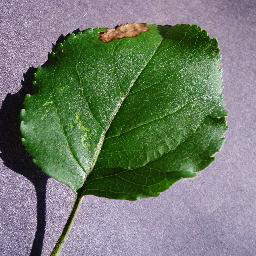

In [34]:
img

In [35]:
img=image.load_img('/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/0b37761a-de32-47ee-a3a4-e138b97ef542___JR_FrgE.S 2908.JPG',target_size=(128,128))

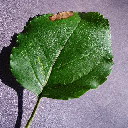

In [36]:
img


In [40]:
x=np.expand_dims(x,axis=0)
x

array([[[[144., 128., 154.],
         [152., 136., 162.],
         [142., 126., 152.],
         ...,
         [128., 114., 137.],
         [127., 113., 136.],
         [119., 105., 128.]],

        [[155., 139., 165.],
         [116., 100., 126.],
         [128., 112., 138.],
         ...,
         [111.,  97., 120.],
         [117., 103., 126.],
         [115., 101., 124.]],

        [[169., 153., 179.],
         [145., 129., 155.],
         [122., 106., 132.],
         ...,
         [120., 106., 129.],
         [124., 110., 133.],
         [116., 102., 125.]],

        ...,

        [[128., 117., 149.],
         [ 99.,  88., 120.],
         [175., 164., 196.],
         ...,
         [167., 161., 187.],
         [139., 133., 159.],
         [144., 138., 164.]],

        [[127., 116., 148.],
         [ 78.,  67.,  99.],
         [159., 148., 180.],
         ...,
         [147., 141., 167.],
         [145., 139., 165.],
         [133., 127., 153.]],

        [[121., 110., 142.],
       

In [41]:
y=np.argmax(model.predict(x),axis=1)
y

array([0])

In [42]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [43]:
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

'Apple_BR'

In [44]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/04d8e1d6-766e-4fcc-9bac-42efb9e6ad33___RS_NLB 3620.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

[2]


'Corn_NLB'

In [45]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/013b7c70-5e3b-42b7-86af-167815a5b04f___RS_HL 7480.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

[1]


'Apple_H'

In [46]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/01ba711d-8d26-4be8-994d-09f5b02fcbe9___Rut._Bact.S 3390.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

[1]


'Apple_H'

In [47]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___healthy/0cc78dac-a333-4a05-b749-660dce8e16b9___Rutg._HL 2495.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

[1]


'Apple_H'

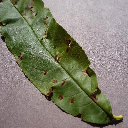

[1]


'Apple_H'

In [48]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/01a48fc7-fafc-4866-a9bf-541f6cf6f6b1___Rut._Bact.S 3436.JPG",target_size=(128,128))
img.show()
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

In [29]:
!pip install watson-machine-learning-client

In [30]:
from ibm_watson_machine_learning import APIClient 
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"egsjLjIMUHSN6mh19HwM8a4t_9IRJHxOsjL8sKB2xNqX"
}

In [31]:
client = APIClient(wml_credentials)

In [37]:
def guid_space_name(client,fruit_deploy_rs):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==fruit_deploy_rs)['metadata']['id'])

In [38]:
space_uid = guid_space_name(client,'fruit_deploy_rs')
print(space_uid)

a1b8750c-ce45-4a16-9cb2-176686bf5fe7


In [39]:
client.set.default_space(space_uid)

'SUCCESS'

In [35]:
!tar -zcvf fruit-pathon-model.tgz fruit_pathon.h5

fruit_pathon.h5


In [36]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [40]:
model_details=client.repository.store_model(model='fruit-pathon-model.tgz',
    meta_props={
    client.repository.ModelMetaNames.NAME:"Fertilizer fruit model",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
    })

In [41]:
model_id=client.repository.get_model_id(model_details)
model_id

'51185cc7-e9a2-4a57-86f2-b8e682d676d9'